In [1]:
#for questions: karenmei@ucsd.edu

#Goal: To evaluate the custom hierarchy: #Metric 1
#	   Metric #1: How well does the model capture novel synapse proteins? (some of which have been recently uncovered by our collaborators using AP/MS/MS)

#	   code for customizing ontologies: DDOT: https://github.com/michaelkyu/ddot/blob/master/examples/Tutorial.ipynb



import numpy as np
from igraph import *
import pandas as pd
import sys

import sys
sys.path.append('C:\\Users\\Anubhav\\Documents\\GitHub\\ddot')

import ddot
from ddot import Ontology
import matplotlib
matplotlib.use("TKAgg")
#print(matplotlib.get_backend())
from matplotlib import pyplot as plt
import networkx as nx
import csv
import scipy.stats as ss
from scipy.stats import hypergeom
from statsmodels.sandbox.stats.multicomp import multipletests

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
def jaccard(a, b):
	s1=set(a)
	s2=set(b)
	return len(s1.intersection(s2)) / len(s1.union(s2))


def metric_1(ont_file, test_gene_list):
	ont1=Ontology.from_table(ont_file)
	ont1_genes=ont1.genes
	test_recovery=jaccard(ont1_genes, test_gene_list)
	print ('recovery of test genes:', test_recovery)
	return test_recovery

In [3]:
synapse_ont = pd.read_table("synapse.txt")

C:\Users\Anubhav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [4]:
synapse_ont.head()

,Parent,Child,EdgeType
0,GO:0008021,GO:0030672,Child-Parent
1,GO:0008021,GO:0034592,Child-Parent
2,GO:0008021,GO:1990474,Child-Parent
3,GO:0008021,GO:1990475,Child-Parent
4,GO:0008021,GO:1990476,Child-Parent


In [19]:
synapse_ont.Parent

0       GO:0008021
1       GO:0008021
2       GO:0008021
3       GO:0008021
4       GO:0008021
5       GO:0014069
6       GO:0014069
7       GO:0014069
8       GO:0030672
9       GO:0030672
10      GO:0030672
11      GO:0031594
12      GO:0031594
13      GO:0031594
14      GO:0031594
15      GO:0031594
16      GO:0032279
17      GO:0032279
18      GO:0032279
19      GO:0032279
20      GO:0032280
21      GO:0032280
22      GO:0032591
23      GO:0042734
24      GO:0042734
25      GO:0042734
26      GO:0042734
27      GO:0042734
28      GO:0043083
29      GO:0043195
           ...    
2663    GO:0098978
2664    GO:0098794
2665    GO:0008021
2666    GO:0030285
2667    GO:0045202
2668    GO:0098978
2669    GO:0098793
2670    GO:0098978
2671    GO:0098794
2672    GO:0098978
2673    GO:0098685
2674    GO:0098793
2675    GO:0045202
2676    GO:0098978
2677    GO:0099091
2678    GO:0098978
2679    GO:0098793
2680    GO:0098978
2681    GO:0098793
2682    GO:0045202
2683    GO:0098978
2684    GO:0

In [23]:
from collections import defaultdict

In [24]:
go_dict = defaultdict(list)

# Initialize with the first couple of terms
first_level = synapse_ont[synapse_ont.EdgeType == "Gene-Term"]
for idx, row in first_level.iterrows():
    go_dict[row.Parent].append(row.Child)
    
old_parents = set(first_level.Parent)
remaining_terms = set(synapse_ont.Parent).difference(old_parents)

In [26]:
i = 0
while len(remaining_terms) > 0:
    
    new_parents = synapse_ont[synapse_ont.Child.isin(old_parents)]
    for idx, row in new_parents.iterrows():
        
        children_genes = go_dict[row.Child]
        go_dict[row.Parent].append(children_genes)
        
    
    old_parents = set(new_parents.Parent)
    remaining_terms = remaining_terms.difference(old_parents)

    print(len(remaining_terms))
    
    i=i + 1
    if i == 10:
        break

    

21
18
18
18
18
18
18
18
18
18


In [27]:
import networkx as nx 

In [32]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [29]:
graph = nx.from_pandas_dataframe(synapse_ont, source='Parent', target='Child')

AttributeError: module 'matplotlib.cbook' has no attribute 'is_string_like'

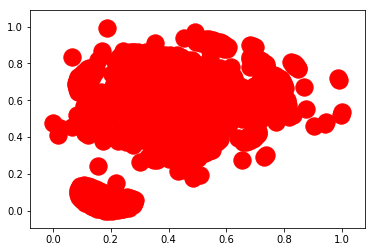

In [33]:
nx.draw_networkx(graph)

In [35]:
graph.edges()

[('GO:0008021', 'GO:0030672'),
 ('GO:0008021', 'GO:0034592'),
 ('GO:0008021', 'GO:1990474'),
 ('GO:0008021', 'GO:1990475'),
 ('GO:0008021', 'GO:1990476'),
 ('GO:0008021', 'GO:0044456'),
 ('GO:0008021', 'GO:0098793'),
 ('GO:0008021', 'ADAM10'),
 ('GO:0008021', 'APBA1'),
 ('GO:0008021', 'APBA2'),
 ('GO:0008021', 'APH1A'),
 ('GO:0008021', 'APP'),
 ('GO:0008021', 'ATP6V0D1'),
 ('GO:0008021', 'BACE1'),
 ('GO:0008021', 'BDNF'),
 ('GO:0008021', 'BIN1'),
 ('GO:0008021', 'BRSK1'),
 ('GO:0008021', 'CDK16'),
 ('GO:0008021', 'CLCN3'),
 ('GO:0008021', 'CLN3'),
 ('GO:0008021', 'COPS4'),
 ('GO:0008021', 'COPS5'),
 ('GO:0008021', 'CTTNBP2'),
 ('GO:0008021', 'DDC'),
 ('GO:0008021', 'DGKI'),
 ('GO:0008021', 'DLG4'),
 ('GO:0008021', 'DNM1'),
 ('GO:0008021', 'GIPC1'),
 ('GO:0008021', 'GRIA1'),
 ('GO:0008021', 'GRIN1'),
 ('GO:0008021', 'GRIN2A'),
 ('GO:0008021', 'HAP1'),
 ('GO:0008021', 'HCRT'),
 ('GO:0008021', 'KIAA1107'),
 ('GO:0008021', 'KIF1A'),
 ('GO:0008021', 'LGI3'),
 ('GO:0008021', 'MFF'),
 ('GO:00